# Probability distributions

In [1]:
%%html
<style>
table {margin-left: 20px !important;}
</style> 

### Table of Contents

I. [Background](#background)

II. [Discrete probability distributions](#discrete)

 | Distribution              | Parameters   | scipy.stats   |
 |:--------------------------|:------------:|:--------------|
 | [Binomial](#binom)        | n, p         | .binom        |
 | [Geometric](#geom)        | p            | .geom         |
 | [Hypergeometric](#hyperg) | M, n, N      | .hypergeom    |
 | [Poisson](#poisson)       | $\mu$        | .poisson      | 

III. [Continuous probability distributions](#continuous)

| Distribution              | Parameters   | scipy.stats   |
|:--------------------------|:------------:|:--------------|
| [Uniform](#uni)           |              |               |
| [Exponential](#expo)      | $\mu$        | .expon        |
| [Normal](#normal)         | $\mu, \sigma$| .norm         |


##  Background<a class="anchor" id="background"></a>

A **random variable** discribes all of the possible numerical outcomes of a random phenomenon.

A statistical experiment determines a specific value of a random variable which can chage on repitition of the experiment. A **probability distribution** gives all posssible values of a random variable and their corresponding probabilities.   

Uppercase X, Y denote random variables (description as text)
Lowercase x, y denote a value of a random variable (a given number)

In [2]:
# Imports
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

## Discrete probability distributions <a class="anchor" id="discrete"></a>

A **probability mass function (pmf)** gives the probability of a discrete random variable for different exact values. Each probability is between 0 and 1, inclusive. The sum of the probabilities is 1. *Note: pmfs are also sometimes called probability distribution functions which gives the same acronym used for probability density functions (pdf), the analogous functions of continous probability distributions.* 

A **cumulative distribution function (cdf)** gives the probability that a random variable is less than or equal to a given value.

### Binomial  <a class="anchor" id="binom"></a> 
X ~ B(n, p)<br>
  Number of successes <br>
  **n** = number of trials (IDD Bernoulli trials)i <br>
  **p** = probability of success

In [3]:
# Mean and variance
n = 200
p = 0.0128
mean, var = stats.binom.stats(n, p)
mean2 = n * p
std_dev = np.sqrt(var)
std_dev2 = np.sqrt(n * p * (1 - p)) 
print('mean = {0} (calculated by scipy)'.format(mean))
print('mean = {0} (calculated as n * p)'.format(mean2))
print('standard_deviation:{0:.4f} (calculated from scipy variance)'.format(std_dev))
print('standard_deviation:{0:.4f} (calculated as (sqrt(npq)))'.format(std_dev))

mean = 2.56 (calculated by scipy)
mean = 2.56 (calculated as n * p)
standard_deviation:1.5897 (calculated from scipy variance)
standard_deviation:1.5897 (calculated as (sqrt(npq)))


In [4]:
# Cumulative density function and Probability mass function 
x = 5
n = 200
p = 0.0128
print(stats.binom.cdf(x, n, p)) # prob <= x
print(stats.binom.pmf(x, n, p)) # prob = x

0.9549616980515235
0.07065497815138377


### Geometric <a class="anchor" id="geom"></a>

In [5]:
p = 0.35
mean, var = stats.geom.stats(p)
print('{0:.3f} {1:.3f}'.format(float(mean), np.sqrt(var)))

2.857 2.304


In [6]:
p = 0.35
n = 3
print(stats.geom.pmf(n, p))  # Probability first failure occurs at n
print(stats.geom.cdf(n, p))  # Probability first failure occurs in n

0.147875
0.725375


### Hypergeometric <a class="anchor" id="hyperg"></a>

In [7]:
M = 100 # total number of objects
n = 18  # number of objects in group 1 
N = 10   # number drawn without replacement
mean, var = stats.hypergeom.stats(M, n, N)
print('{0:.3f} {1:.3f}'.format(float(mean), np.sqrt(var))) # Expected value from group n

1.800 1.158


In [8]:
x = 2
print(stats.hypergeom.pmf(x, M, n, N))  # Probability drew exactly x 
print(stats.hypergeom.cdf(x, M, n, N))  # Probability drew <= x

0.31502296054685713
0.743335223971568


### Poisson<a class="anchor" id="poisson"></a>

Probability of a number of occurances of a discrete, independent event given the average rate of that event.

[0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.1804470443154836, 0.0902235221577418]


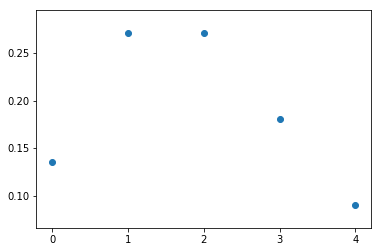

In [9]:
k_range = range(5)     #  list of k (numer of events) to look at
lamb = 2               #  (events per interval (i.e. 1 per 100 years))

p_k = [((np.e ** -lamb) * (lamb ** k)) / np.math.factorial(k) for k in k_range]

print(p_k)

plt.figure()
plt.scatter(k_range, p_k)
plt.xticks(k_range)
plt.show()
plt.close()

In [10]:
mu = 3  # rate of occurance (i.e. 0.75 per 15 min)
mean, var = stats.poisson.stats(mu)
std_dev = np.sqrt(var)
print('mean:{0} \nstandard_deviation:{1:.4f}'.format(mean, std_dev))

mean:3.0 
standard_deviation:1.7321


In [11]:
mu = 32

print(stats.poisson.cdf(4, mu)) # prob <= x
print()

print(stats.poisson.pmf(5, mu)) # prob = x
print(1 - stats.poisson.cdf(40, mu)) # prob = x

6.293710352933338e-10

3.541157347948532e-09
0.07066085287803281


## Continuous probability distributions <a class="anchor" id="continuous"></a>

### Uniform<a class="anchor" id="uni"></a>

### Exponential<a class="anchor" id="expo"></a>

In [12]:
mu = 23

mean, var, skew, kurt = stats.expon.stats(scale = mu, moments='mvsk')
std_dev = np.sqrt(var)
print('mean:{0} \nstandard_deviation:{1:.4f}'.format(mean, std_dev))

mu = 22
x = 20
print(stats.expon.pdf(x, scale = mu)) # prob = x
print(stats.expon.cdf(x, scale = mu)) # prob <= x
#print(stats.expon.cdf(5, scale = mu)) # prob <= x
print()
#print(stats.expon.ppf(0.5, scale = mu)) # prob <= x

mean:23.0 
standard_deviation:23.0000
0.01831319643314241
0.5971096784708669



### Normal<a class="anchor" id="normal"></a>

In [36]:
mu = 36.9
sigma = 13.9
x = 23
x2 = 64.7
per = 0.90 # percentile
print(stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x, mu, sigma))
print(stats.norm.ppf(per, mu, sigma)) #  Inverse of cdf
print()

# Confidence interval bounds in SDs
  # note, techincally requires known population SD to apply

# z-scores (multiple by standard error of the mean)
print(stats.norm.ppf(0.025, 0, 1)) # lower bound z-score
print(stats.norm.ppf(0.975, 0, 1)) # upper bound z-score

# or go straight to getting bounds with .interval
x_bar = 1.024
sigma = 0.337
n = 30
print(stats.norm.interval(0.98, x_bar, (sigma / np.sqrt(n)))) 

# n required for desired confidence and bounds 
ebm = 2
conf = 0.95
sigma = 15

alpha = (1 - conf)
z = (stats.norm.ppf((alpha / 2), 0, 1)) 
n = np.ceil((z ** 2 * sigma ** 2) / (ebm ** 2))
print(n)


0.8185946141203637
54.71356676106994

-1.9599639845400545
1.959963984540054
(0.8808656297226961, 1.1671343702773038)
217.0


### Sources

Illowsk, Barbara; Dean, Susan. Introductory Statistics. OpenStax College. Kindle Edition

SciPy 1.0.0 Release Notes